In [181]:
'''

Author: Zhuofan Dong
Date: 10/13/2022
Subject: Assignment 1 for Statistical Analysis

'''

'\n\nAuthor: Zhuofan Dong\nDate: 10/13/2022\nSubject: Assignment 1 for Statistical Analysis\n\n'

In [21]:
import numpy as np
import pandas as pd
import os
os.getcwd()
os.chdir(r'C:\Users\Primo\OneDrive\Desktop')
data = pd.read_csv('cars.csv')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    int64  
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 50.3+ KB


# Question 1

In [33]:
data['MSRP'].describe().apply("{0:.2f}".format)

count       428.00
mean      32774.86
std       19431.72
min       10280.00
25%       20334.25
50%       27635.00
75%       39205.00
max      192465.00
Name: MSRP, dtype: object

In [34]:
data['Weight'].describe().apply("{0:.2f}".format)

count     428.00
mean     3577.95
std       758.98
min      1850.00
25%      3104.00
50%      3474.50
75%      3977.75
max      7190.00
Name: Weight, dtype: object

In [35]:
data['Length'].describe().apply("{0:.2f}".format)

count    428.00
mean     186.36
std       14.36
min      143.00
25%      178.00
50%      187.00
75%      194.00
max      238.00
Name: Length, dtype: object

# Question 2

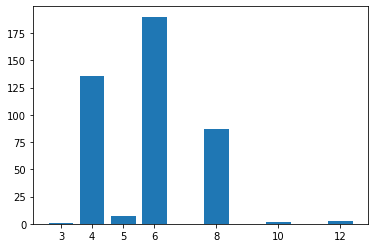

In [67]:
import matplotlib.pyplot as plt

df_cylinder = data['Cylinders']
df_cylinder = df_cylinder.dropna()

freq_cylinder = df_cylinder.value_counts()

freq_values = freq_cylinder.tolist()
freq_index = freq_cylinder.index.tolist()
freq_index = [int(x) for x in freq_index]

plt.bar(freq_index,freq_values)
plt.xticks(freq_index, freq_index)
plt.show()

Yes, it looks like the binomial distribution. 

# Question 3

In [102]:
df_msrp = data['MSRP']
df_weight = data['Weight']
df_length = data['Length']


## Formulas from Module

def univariate (y):
   # Initialize
   y_nvalid = 0
   y_min = None
   y_max = None
   y_mean = None
   # Loop through all the elements
   for u in y:
      if (not np.isnan(u)):
         y_nvalid = y_nvalid + 1
         if (y_min is not None):
            if (u < y_min):
               y_min = u
         else:
            y_min = u
         if (y_max is not None):
            if (u > y_max):
               y_max = u
         else:
            y_max = u
         if (y_mean is not None):
            y_mean = y_mean + u
         else:
            y_mean = u
   # Finalize
   if (y_nvalid > 0):
      y_mean = y_mean / y_nvalid
   return (y_nvalid, y_min, y_max, y_mean)

def shimazaki_criterion (y, d_list):
   number_bins = []
   matrix_boundary = []
   shimazaki_criterion = []
   y_nvalid, y_min, y_max, y_mean = univariate (y)
   if (y_nvalid <= 0):
      raise ValueError('There are no non-missing values in the data vector.')
   else:
      # Loop through the bin width candidates
      for delta in d_list:
         y_middle = delta * np.round(y_mean / delta)
         n_bin_left = np.ceil((y_middle - y_min) / delta)
         n_bin_right = np.ceil((y_max - y_middle) / delta)
         y_low = y_middle - n_bin_left * delta
         # Assign observations to bins starting from 0
         list_boundary = []
         n_bin = n_bin_left + n_bin_right
         bin_index = 0
         bin_boundary = y_low
         list_boundary.append(bin_boundary)
         for i in np.arange(n_bin):
            bin_boundary = bin_boundary + delta
            bin_index = np.where(y > bin_boundary, i+1, bin_index)
            list_boundary.append(bin_boundary)
         # Count the number of observations in each bins
         uvalue, ucount = np.unique(bin_index, return_counts = True)
         # Calculate the average frequency
         mean_ucount = np.mean(ucount)
         ssd_ucount = np.mean(np.power((ucount - mean_ucount), 2))
         criterion = (2.0 * mean_ucount - ssd_ucount) / delta / delta
         number_bins.append(n_bin)
         matrix_boundary.append(list_boundary)
         shimazaki_criterion.append(criterion)
        
   return(number_bins, matrix_boundary, shimazaki_criterion)

In [127]:
#Next bin width is 200000 which is greater than the range
d_list_msrp = [1, 2, 2.5, 5, 10, 20, 25, 50, 100, 200, 250, 500, 1000, 2000, 2500, 5000, 10000, 20000, 25000, 50000, 100000]
#MSRP Binwidth
msrp_number_bins, msrp_matrix_boundary, msrp_shimazaki_criterion = shimazaki_criterion (df_msrp, 
d_list_msrp)

df_msrp_binwidth = pd.DataFrame(list(zip(msrp_number_bins, msrp_shimazaki_criterion)),index=d_list_msrp,columns=['Number of Bins','Shamazaki Criterion'])

#Return the index of min value
minValueIndex = df_msrp_binwidth['Shamazaki Criterion'].idxmin()
minValueIndex

5000.0

In [126]:
#Next bin width is 100 which is greater than the range
d_list_length = [1, 2, 2.5, 5, 10, 20, 25, 50]
#Length Binwidth
length_number_bins, length_matrix_boundary, length_shimazaki_criterion = shimazaki_criterion (df_length, 
d_list_length)

df_length_binwidth = pd.DataFrame(list(zip(length_number_bins, length_shimazaki_criterion)),index=d_list_length,columns=['Number of Bins','Shamazaki Criterion'])

#Return the index of min value
minValueIndex = df_length_binwidth['Shamazaki Criterion'].idxmin()
minValueIndex

2.5

In [125]:
#Next bin width is 10000 which is greater than the range
d_list_weight = [1, 2, 2.5, 5, 10, 20, 25, 50, 100, 200, 250, 500, 1000, 2000, 2500, 5000]
#Weight Binwidth
weight_number_bins, weight_matrix_boundary, weight_shimazaki_criterion = shimazaki_criterion (df_weight, 
d_list_weight)

df_weight_binwidth = pd.DataFrame(list(zip(weight_number_bins, weight_shimazaki_criterion)),index=d_list_weight,columns=['Number of Bins','Shamazaki Criterion'])

#Return the index of min value
minValueIndex = df_weight_binwidth['Shamazaki Criterion'].idxmin()
minValueIndex

100.0

According to the dataframes respectively, we can find the minimum shamazaki criterion corresponding to the bin width. For MSRP,the smallest criterion is when bin width is 5000. For Length, the smallest criterion is when bin width is 2.5. For Weight, the smallest criterion is when bin width is 100.

**Histogram for MSRP**

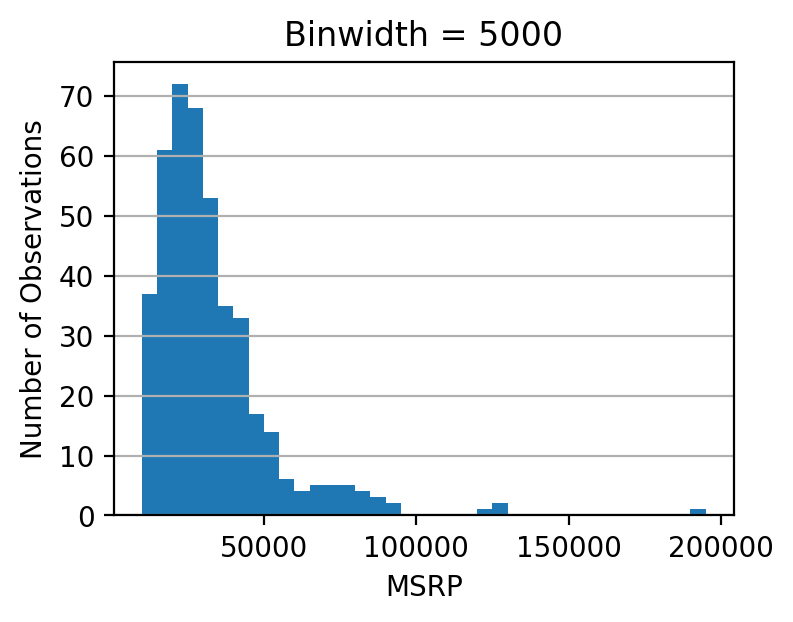

In [138]:
for delta, bin_boundary in zip(d_list_msrp, msrp_matrix_boundary):
    if delta == 5000:
        plt.figure(figsize = (4,3), dpi = 200)
        plt.hist(df_msrp, bins = bin_boundary, align = 'mid')
        plt.title('Binwidth = ' + str(delta))
        plt.xlabel('MSRP')
        plt.ylabel('Number of Observations')
        plt.grid(axis = 'y')
        plt.show()
    else:
        continue

**Histogram for Length**

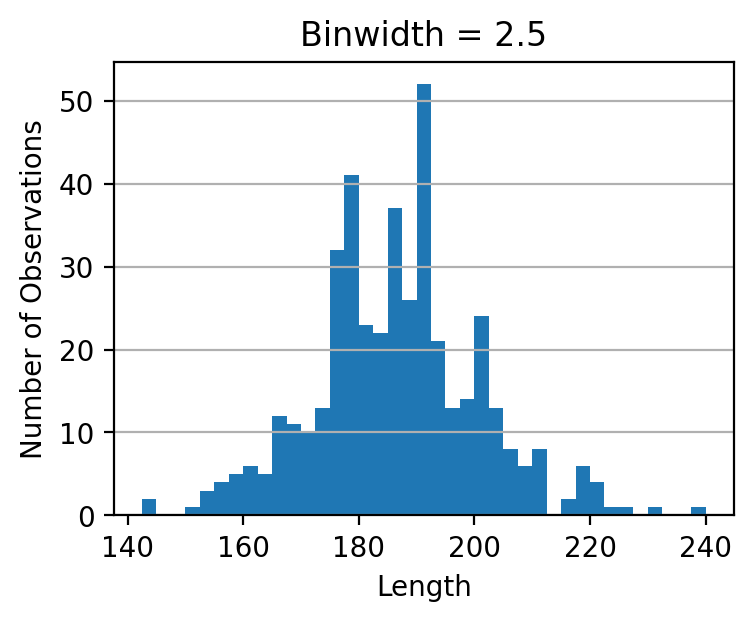

In [131]:
for delta, bin_boundary in zip(d_list_length, length_matrix_boundary):
    if delta == 2.5:
        plt.figure(figsize = (4,3), dpi = 200)
        plt.hist(df_length, bins = bin_boundary, align = 'mid')
        plt.title('Binwidth = ' + str(delta))
        plt.xlabel('Length')
        plt.ylabel('Number of Observations')
        plt.grid(axis = 'y')
        plt.show()
    else:
        continue

**Histogram for Weight**

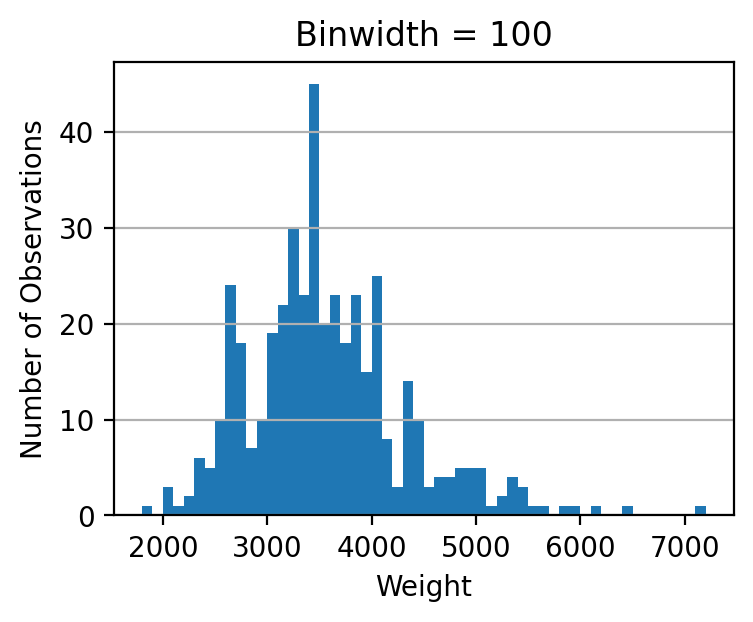

In [137]:
for delta, bin_boundary in zip(d_list_weight, weight_matrix_boundary):
    if delta == 100:
        plt.figure(figsize = (4,3), dpi = 200)
        plt.hist(df_weight, bins = bin_boundary, align = 'mid')
        plt.title('Binwidth = ' + str(delta))
        plt.xlabel('Weight')
        plt.ylabel('Number of Observations')
        plt.grid(axis = 'y')
        plt.show()
    else:
        continue

# Question 4

In [139]:
from scipy.stats import norm, shapiro, anderson

**Analysis for Length**


Z Minimum =  145.78897900509048
Z Maximum =  230.01831948486614


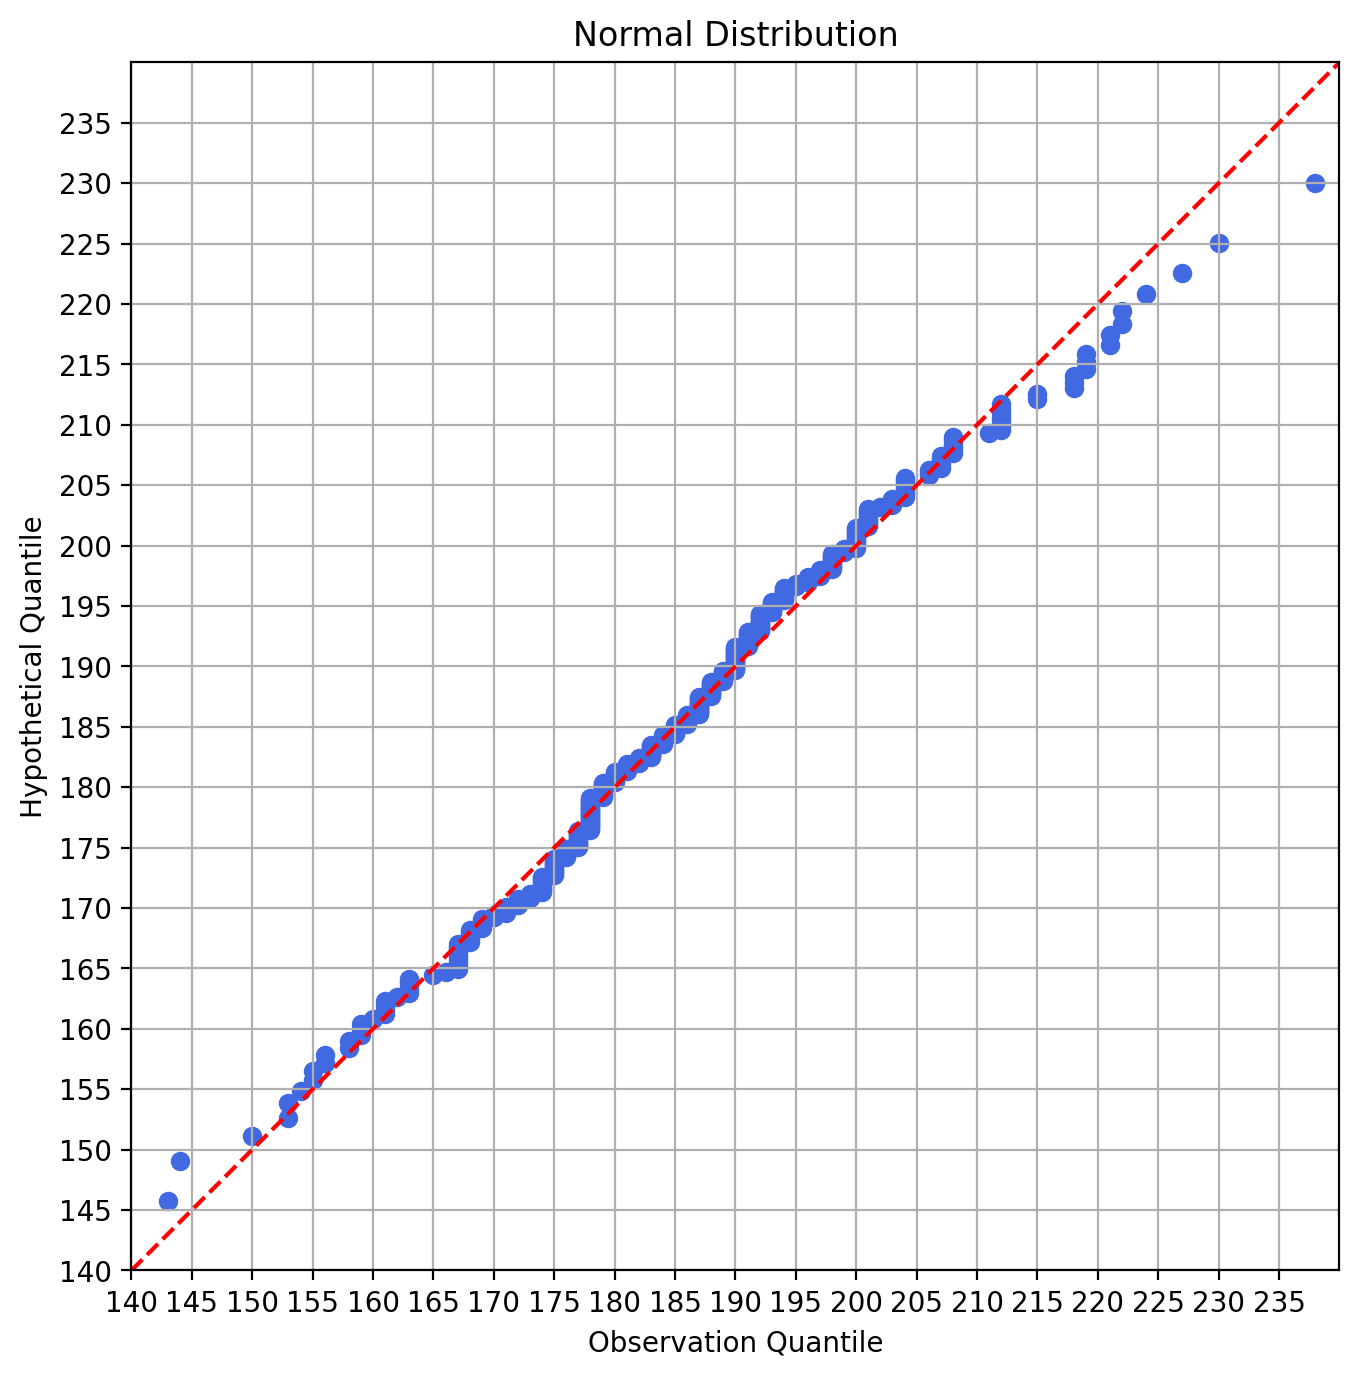

In [145]:
n = len(df_length)
# Sort the values in ascending order
df_length_sorted = np.sort(df_length)
# Calculate the hypothetical quantiles
u_mean = np.mean(df_length)
u_stddev = np.std(df_length)
p = np.arange(1,(n+1)) / (n + 0.5)
z = norm.ppf(p, loc = u_mean, scale = u_stddev)
print('\nZ Minimum = ', np.min(z))
print('Z Maximum = ', np.max(z))
fig, ax = plt.subplots(nrows = 1, ncols = 1, dpi = 200, figsize = (8,8))
ax.scatter(df_length_sorted, z, marker = 'o', c = 'royalblue')
ax.set_xlim(xmin = 140, xmax = 240)
ax.set_ylim(ymin = 140, ymax = 240)
ax.set_xticks(np.arange(140, 240, 5.0))
ax.set_yticks(np.arange(140, 240, 5.0))
ax.axline((200,200), slope = 1.0, linestyle = '--', color = 'red')
ax.set_xlabel('Observation Quantile')
ax.set_ylabel('Hypothetical Quantile')
ax.set_aspect(1.0)
ax.set_title('Normal Distribution')
ax.margins(x = 0.1, y = 0.1)
ax.grid()
plt.show()

In [143]:
# Shapiro-Wilks test for normality
shapiro_test = shapiro(df_length)
print('\nShapiro Test = ', shapiro_test[0])
print('     p-value = ', shapiro_test[1])
# Anderson-Darling test for normality
anderson_test = anderson(df_length, dist = 'norm')
print('\n  Anderson Test = ', anderson_test[0])
print('Critical Values = ', anderson_test[1])
print('       p-values = ', anderson_test[2]/100.0)


Shapiro Test =  0.9911824464797974
     p-value =  0.011863326653838158

  Anderson Test =  1.286219586060156
Critical Values =  [0.571 0.65  0.78  0.91  1.082]
       p-values =  [0.15  0.1   0.05  0.025 0.01 ]


**It is obvious that both Shapiro and Anderson Test indicate that we have to reject the null hypothesis, given the p-value is less than 0.05 significance level for Shapiro Test and test statistic is greater than the critical value of any level for Anderson Test**

**Analysis for Weight**


Z Minimum =  1433.1995347295897
Z Maximum =  5885.678607741062


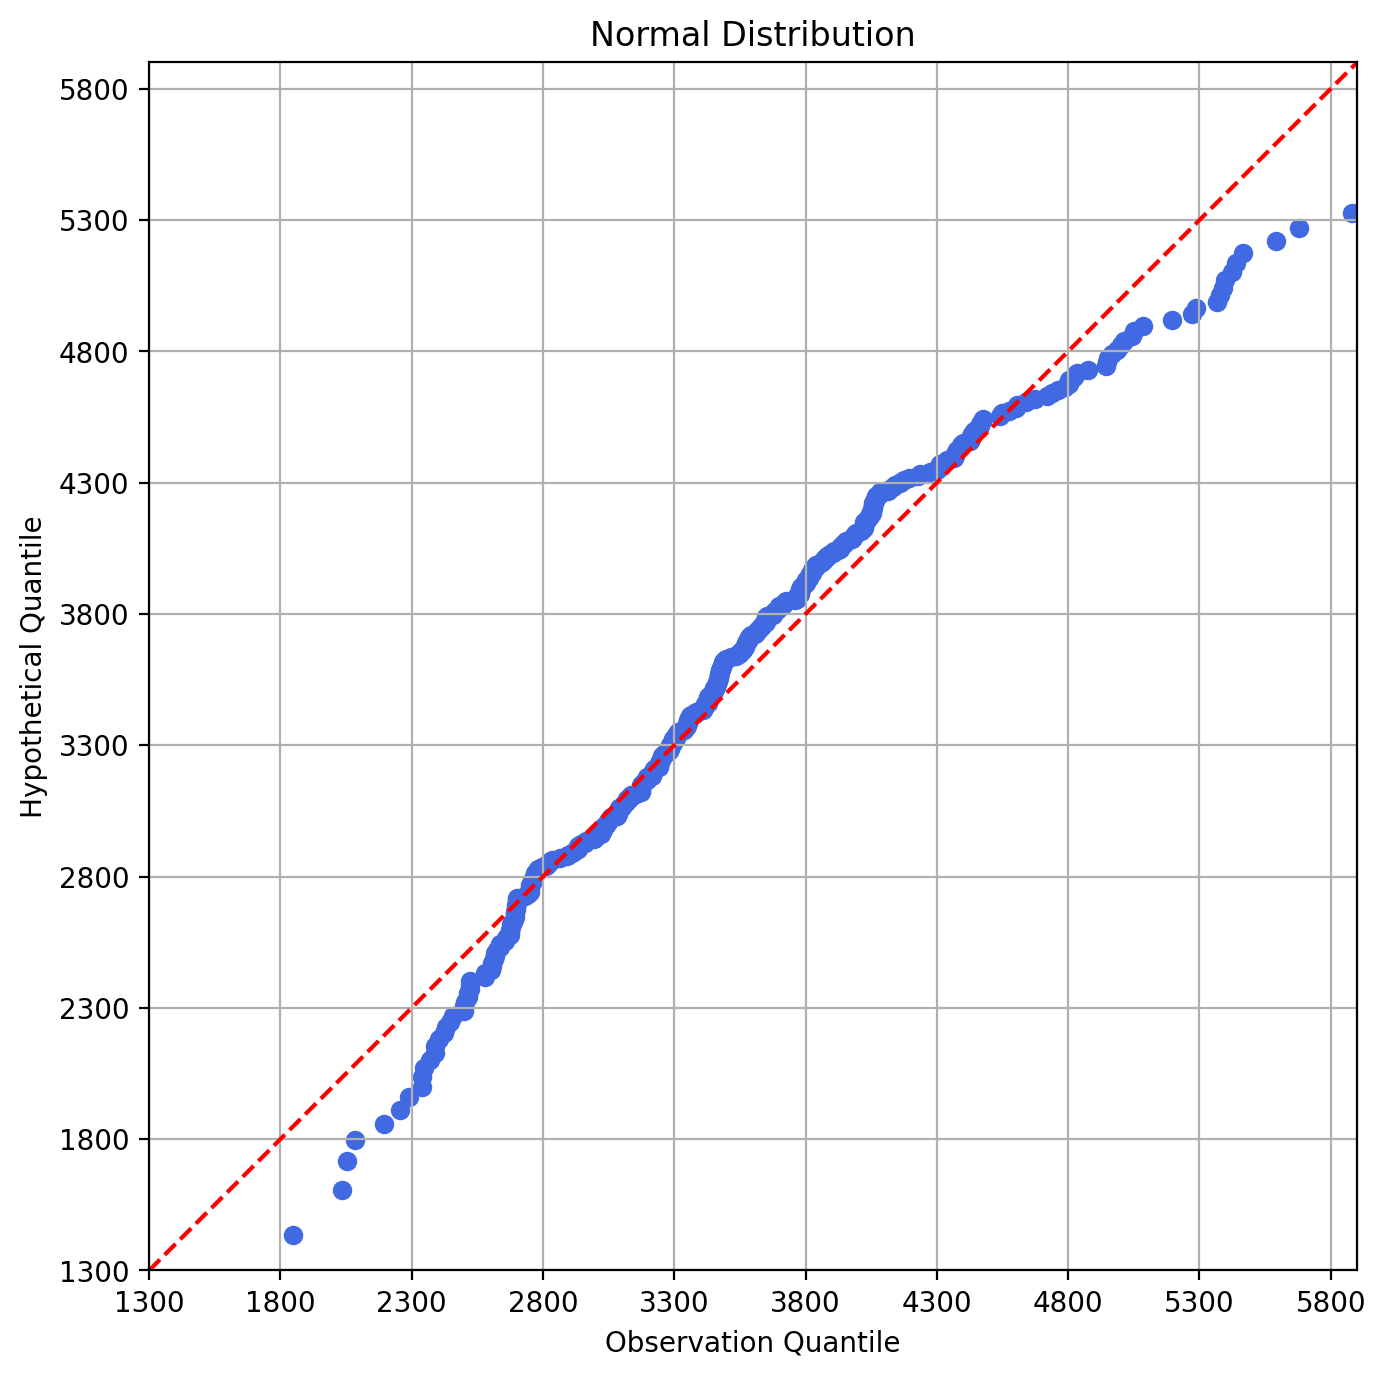

In [151]:
n = len(df_weight)
# Sort the values in ascending order
df_weight_sorted = np.sort(df_weight)
# Calculate the hypothetical quantiles
u_mean = np.mean(df_weight)
u_stddev = np.std(df_weight)
p = np.arange(1,(n+1)) / (n + 0.5)
z = norm.ppf(p, loc = u_mean, scale = u_stddev)
print('\nZ Minimum = ', np.min(z))
print('Z Maximum = ', np.max(z))
fig, ax = plt.subplots(nrows = 1, ncols = 1, dpi = 200, figsize = (8,8))
ax.scatter(df_weight_sorted, z, marker = 'o', c = 'royalblue')
ax.set_xlim(xmin = 1400, xmax = 5900)
ax.set_ylim(ymin = 1400, ymax = 5900)
ax.set_xticks(np.arange(1300, 6000, 500.0))
ax.set_yticks(np.arange(1300, 6000, 500.0))
ax.axline((200,200), slope = 1.0, linestyle = '--', color = 'red')
ax.set_xlabel('Observation Quantile')
ax.set_ylabel('Hypothetical Quantile')
ax.set_aspect(1.0)
ax.set_title('Normal Distribution')
ax.margins(x = 0.1, y = 0.1)
ax.grid()
plt.show()

In [152]:
# Shapiro-Wilks test for normality
shapiro_test = shapiro(df_weight)
print('\nShapiro Test = ', shapiro_test[0])
print('     p-value = ', shapiro_test[1])
# Anderson-Darling test for normality
anderson_test = anderson(df_weight, dist = 'norm')
print('\n  Anderson Test = ', anderson_test[0])
print('Critical Values = ', anderson_test[1])
print('       p-values = ', anderson_test[2]/100.0)


Shapiro Test =  0.9589154720306396
     p-value =  1.4718520846557226e-09

  Anderson Test =  3.804003476182743
Critical Values =  [0.571 0.65  0.78  0.91  1.082]
       p-values =  [0.15  0.1   0.05  0.025 0.01 ]


**It is obvious that both Shapiro and Anderson Test indicate that we have to reject the null hypothesis, given the p-value is less than 0.05 significance level for Shapiro Test and test statistic is greater than the critical value of any level for Anderson Test**

# Question 5


Z Minimum =  32820.20329818783
Z Maximum =  163852.35057753872


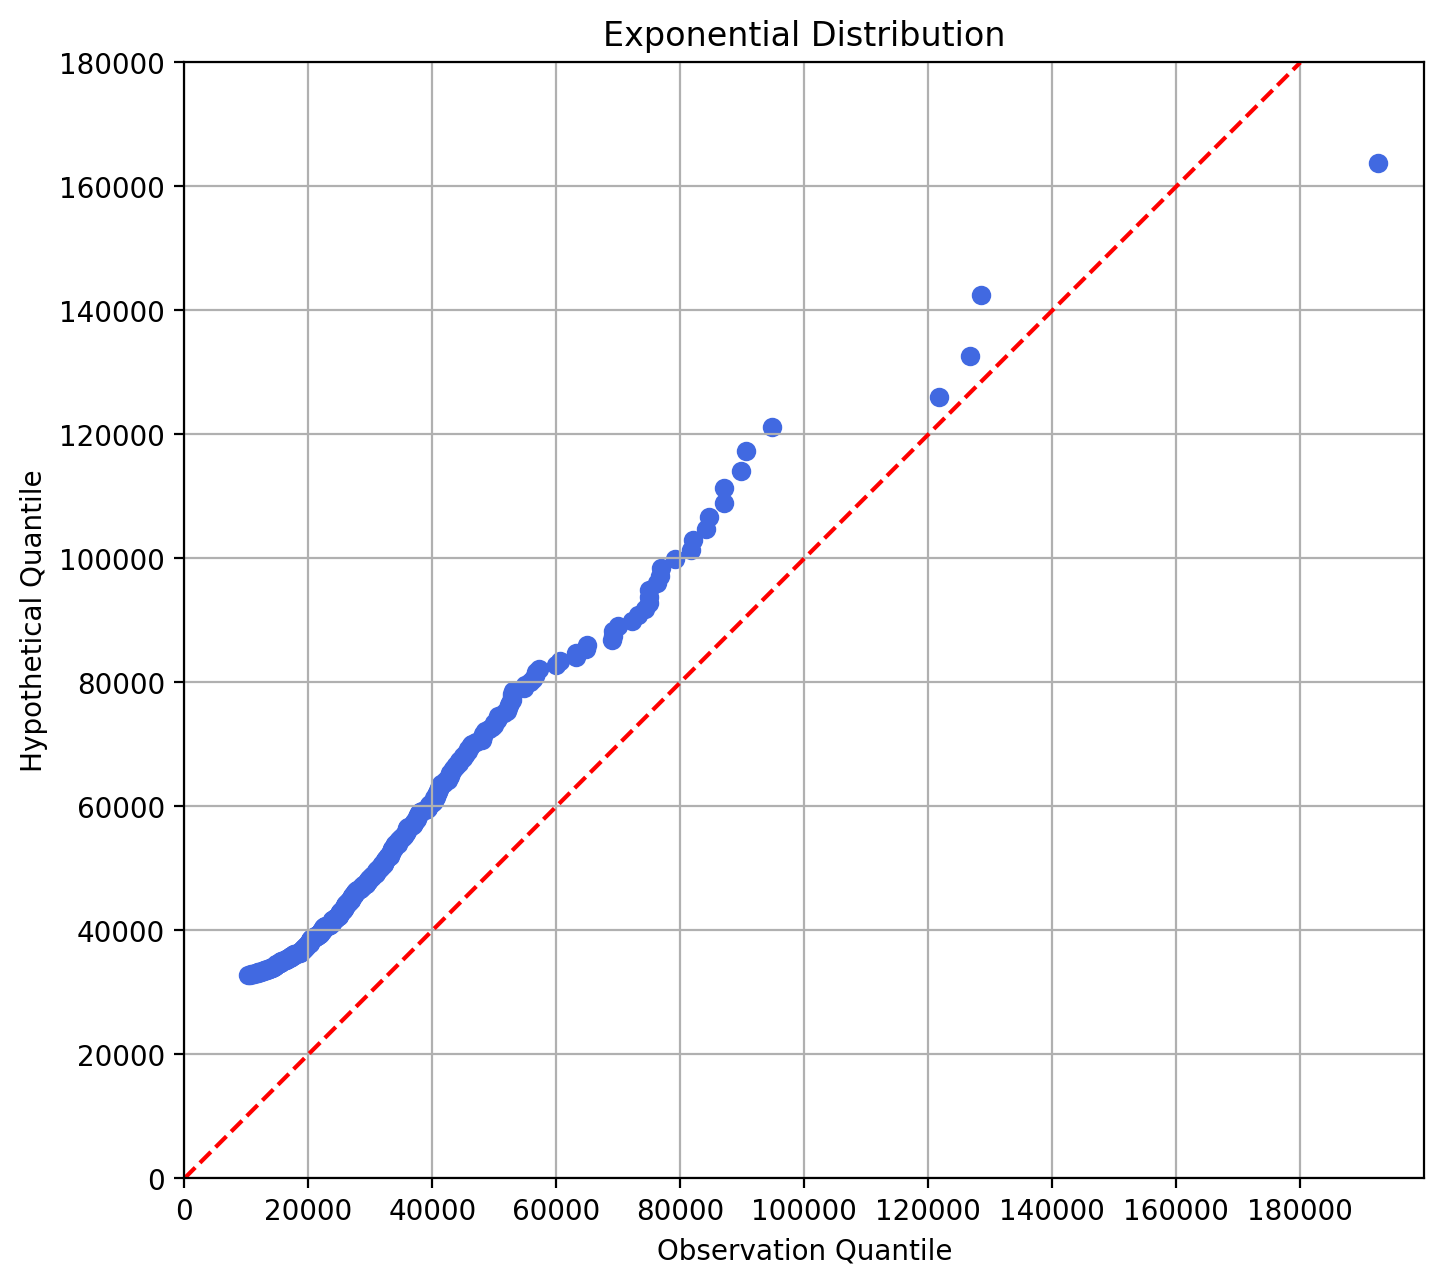

In [180]:
from scipy.stats import expon

n = len(df_msrp)
# Sort the values in ascending order
df_msrp_sorted = np.sort(df_msrp)
# Calculate the hypothetical quantiles
u_mean = np.mean(df_msrp)
u_stddev = np.std(df_msrp)
p = np.arange(1,(n+1)) / (n + 0.5)
z = expon.ppf(p, loc = u_mean, scale = u_stddev)
print('\nZ Minimum = ', np.min(z))
print('Z Maximum = ', np.max(z))
fig, ax = plt.subplots(nrows = 1, ncols = 1, dpi = 200, figsize = (8,8))
ax.scatter(df_msrp_sorted, z, marker = 'o', c = 'royalblue')
ax.set_xlim(xmin = 0, xmax = 200000)
ax.set_ylim(ymin = 0, ymax = 20000)
ax.set_xticks(np.arange(0, 200000, 20000.0))
ax.set_yticks(np.arange(0, 200000, 20000.0))
ax.axline((200,200), slope = 1.0, linestyle = '--', color = 'red')
ax.set_xlabel('Observation Quantile')
ax.set_ylabel('Hypothetical Quantile')
ax.set_aspect(1.0)
ax.set_title('Exponential Distribution')
ax.margins(x = 0.1, y = 0.1)
ax.grid()
plt.show()

In [179]:
print("The mean of MSRP is ", u_mean, " and the standard deviation of MSRP is ", u_stddev)

The mean of MSRP is  32774.85514018692  and the standard deviation of MSRP is  19409.002794915406


**Given the Q-Q plot and the comparison of mean and the standard deviation of the MSRP data, I do not think it follows the exponential distribution**